In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout,Bidirectional
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="tensorflow")
warnings.resetwarnings()


In [ ]:
df = pd.read_csv('../dataset/dataset_2.csv') 

bool_columns = df.select_dtypes(include=bool).columns

df = df.drop(columns=['StartTime','TaskID','DistanceFromDataCenter', 'DataCenterCpuCost', 'DataCenterRamCost',
                      'DataCenterStorageCost', 'DataCenterBwCost', 'DataCenterTotalLoad',
                      'NetworkDelay', 'CET', 'ObjectiveFunction'])
# Convert boolean columns to integers (True -> 1, False -> 0)
df[bool_columns] = df[bool_columns].astype(int)

# Print the modified DataFrame

X = df.drop('DataCenterID', axis=1)  # Features
y = df['DataCenterID']-3  # Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
unique_labels = np.unique(y_train.values)
print(unique_labels)
print(df.info())
num_classes = len(unique_labels)
# Example of feature engineering


In [ ]:
# Pairplot to visualize relationships
sns.pairplot(df, hue='DataCenterID')
plt.show()

# # Correlation heatmap
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.show()


In [ ]:
if (len(X_train.shape)<3):
    X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

print(" xtrain ", X_train.shape, "\n", "ytrain ", y_train.shape, "\n", "xtest  ", X_test.shape, "\n", "ytest ", y_test.shape, "\n")




In [28]:
def trainModel(hyperparameters):
    # Build and train the model
    model = Sequential()
    model.add(LSTM(units=int(hyperparameters['units']), input_shape=(1, X_train.shape[2]), return_sequences=True))
    model.add(Dropout(hyperparameters['dropout_rate']))
    model.add(LSTM(units=int(hyperparameters['units']) // 2))
    model.add(Dense(units=num_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=hyperparameters['learning_rate']),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='accuracy', patience=15)
    hist = model.fit(X_train, y_train,
                        epochs=100,
                        batch_size=int(hyperparameters['batch_size']),
                        validation_data=(X_test, y_test),
                        callbacks=[early_stopping])
    return model,hist
SNAKE_hyperparameters = {'units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32}
GA_hyperparameters =   {'units': 70.04564, 'dropout_rate': 0.1, 'learning_rate': 0.0021, 'batch_size': 21}   

model,hist= trainModel(GA_hyperparameters)
ga_accuracy = max(hist.history["accuracy"])

model,hist= trainModel(SNAKE_hyperparameters)
snake_accuracy = max(hist.history["accuracy"])





Epoch 1/100
77/77 [==============================] - 6s 27ms/step - loss: 0.7232 - accuracy: 0.7056 - val_loss: 0.4972 - val_accuracy: 0.8000
Epoch 2/100
77/77 [==============================] - 1s 7ms/step - loss: 0.5052 - accuracy: 0.7806 - val_loss: 0.4425 - val_accuracy: 0.8150
Epoch 3/100
77/77 [==============================] - 0s 6ms/step - loss: 0.4707 - accuracy: 0.7994 - val_loss: 0.4255 - val_accuracy: 0.8275
Epoch 4/100
77/77 [==============================] - 0s 6ms/step - loss: 0.4472 - accuracy: 0.8094 - val_loss: 0.4357 - val_accuracy: 0.8050
Epoch 5/100
77/77 [==============================] - 0s 6ms/step - loss: 0.4462 - accuracy: 0.8044 - val_loss: 0.4498 - val_accuracy: 0.8075
Epoch 6/100
77/77 [==============================] - 0s 6ms/step - loss: 0.4446 - accuracy: 0.8044 - val_loss: 0.4173 - val_accuracy: 0.8200
Epoch 7/100
77/77 [==============================] - 0s 6ms/step - loss: 0.4349 - accuracy: 0.8125 - val_loss: 0.4055 - val_accuracy: 0.8350
Epoch 8/100


snake  Accuracy:  88 %
GA Accuracy:  83 %
13/13 [==============================] - 1s 4ms/step


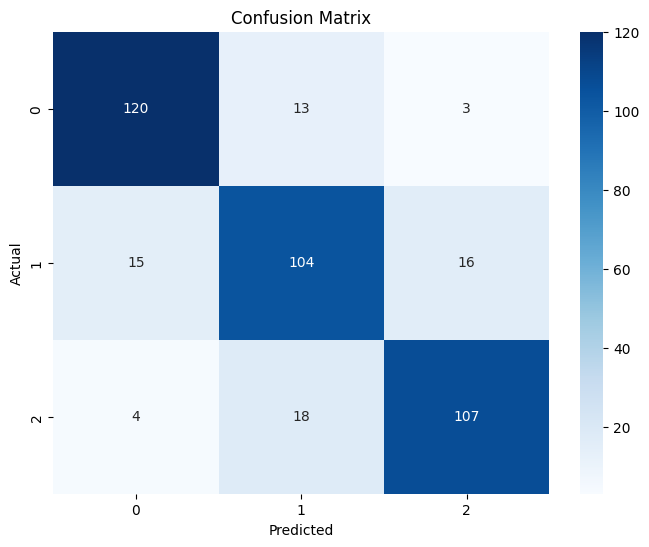

In [30]:
accuracy = max(hist.history["accuracy"])
print("snake  Accuracy: ",int(snake_accuracy* 100) ,'%')
print("GA Accuracy: ",int(ga_accuracy* 100) ,'%')


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)



# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Create a colorful confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
# model.save('../models/ga_snake**.keras')


# SNAKE ALGORITHM

In [27]:

# Define the Search Space
units = [32, 64, 128]
dropout_rates = [0.1, 0.2, 0.3]
learning_rates = [0.001, 0.005]
batch_sizes = [32, 64]

# Initial Random Selection from Search Space
current_hyperparameters = {
    "units": np.random.choice(lstm_units),
    "dropout_rate": np.random.choice(dropout_rates),
    "learning_rate": np.random.choice(learning_rates),
    "batch_size": np.random.choice(batch_sizes)
}

# Store the best hyperparameters and accuracy
best_hyperparameters = None
best_accuracy = 0

# Function to train a model with given hyperparameters

# SOA Loop
for iteration in range(10):
    _,hist = trainModel(current_hyperparameters)
    accuracy=hist.history["accuracy"][-1]
    # Update best hyperparameters if better ones are found
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyperparameters = current_hyperparameters.copy()

        # Greedy Exploitation: Refine search around the best hyperparameters
        # Here, we're perturbing the hyperparameters slightly
        current_hyperparameters = {
            "units": max(32, best_hyperparameters["units"] + np.random.choice([-16, 16])),
            "dropout_rate": min(0.3, max(0.1, best_hyperparameters["dropout_rate"] + np.random.choice([-0.1, 0.1]))),
            "learning_rate": min(0.005, max(0.001, best_hyperparameters["learning_rate"] * np.random.choice([0.5, 1.5]))),
            "batch_size": max(32, best_hyperparameters["batch_size"] + np.random.choice([-16, 16]))
        }
    else:
        # Random Exploration
        current_hyperparameters = {
            "units": np.random.choice(lstm_units),
            "dropout_rate": np.random.choice(dropout_rates),
            "learning_rate": np.random.choice(learning_rates),
            "batch_size": np.random.choice(batch_sizes)
        }

print("Best Hyperparameters:", best_hyperparameters)


Epoch 1/10
25/25 [==============================] - 5s 48ms/step - loss: 0.9323 - accuracy: 0.6256 - val_loss: 0.7063 - val_accuracy: 0.7050
Epoch 2/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6609 - accuracy: 0.7206 - val_loss: 0.5497 - val_accuracy: 0.7425
Epoch 3/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5871 - accuracy: 0.7375 - val_loss: 0.5045 - val_accuracy: 0.7675
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5333 - accuracy: 0.7700 - val_loss: 0.4648 - val_accuracy: 0.7950
Epoch 5/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5115 - accuracy: 0.7894 - val_loss: 0.4895 - val_accuracy: 0.7950
Epoch 6/10
25/25 [==============================] - 0s 6ms/step - loss: 0.4961 - accuracy: 0.7819 - val_loss: 0.4556 - val_accuracy: 0.7925
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 0.4847 - accuracy: 0.8025 - val_loss: 0.4352 - val_accuracy: 0.8225
Epoch 8/10
25/25 [=